In [1]:
from config import * # Import all configurations
%matplotlib inline

✅ 字体加载成功: Microsoft YaHei


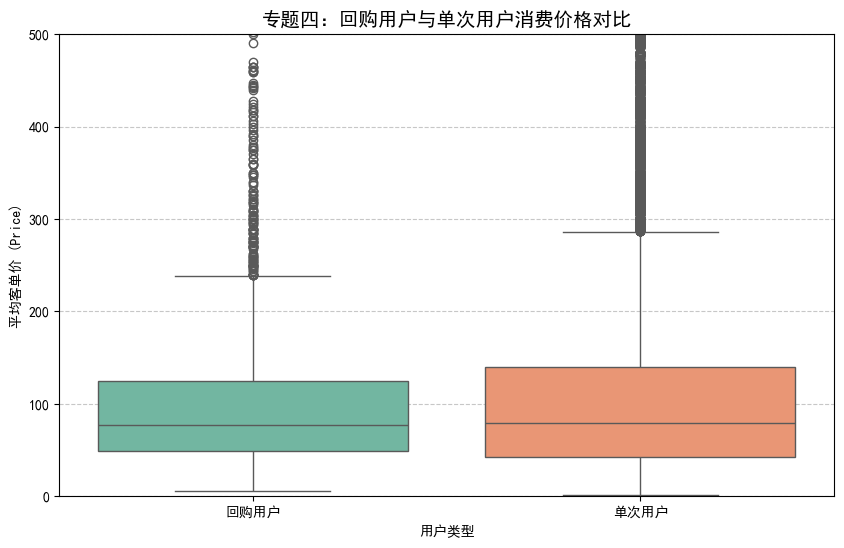

--- 用户分层统计结果 ---
             count        mean         std   min   25%    50%      75%     max
user_type                                                                     
单次用户       90557.0  126.455110  192.214737  0.85  42.0  79.00  139.900  6735.0
回购用户        2801.0  105.604563  122.811104  5.99  49.0  77.45  124.995  3694.0


In [ ]:
# 1. 加载专题四数据
with open('../sql_scripts/04_customer_retention_price.sql', 'r') as f:
    query = f.read()
df_retention = pd.read_sql(query, conn)

# 2. 核心逻辑：用户分层
# 定义：下单次数 > 1 为回购用户，否则为单次用户

df_retention['user_type'] = df_retention['purchase_count'].apply(
    lambda x: '回购用户' if x > 1 else '单次用户'
) # 添加用户类型标签  若数据增加至一亿行，可用df['user_type'] = np.where(df['purchase_count'] > 1, '回购用户', '单次用户')，直接在内存块操作，速度会更快

# 3. 可视化：回购用户 vs 单次用户客单价对比
plt.figure(figsize=(10, 6))

# 使用箱线图查看价格分布，限制 y 轴范围以排除极端高客单价干扰
sns.boxplot(
    x='user_type', 
    y='avg_item_price', 
    data=df_retention,
    hue='user_type',
    palette='Set2',
    legend=False
)

plt.ylim(0, 500) # 聚焦在 500 巴西雷亚尔以内的主要消费区间
plt.title('专题四：回购用户与单次用户消费价格对比', fontsize=14)
plt.xlabel('用户类型')
plt.ylabel('平均客单价 (Price)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. 打印核心统计数据进行对比
print("--- 用户分层统计结果 ---")
print(df_retention.groupby('user_type')['avg_item_price'].describe())